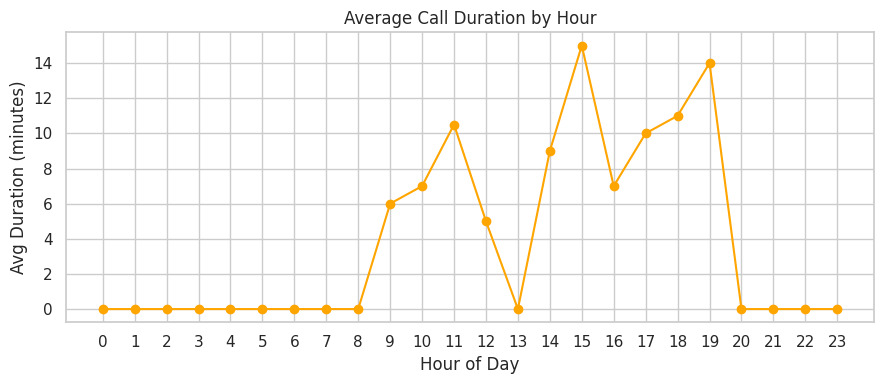

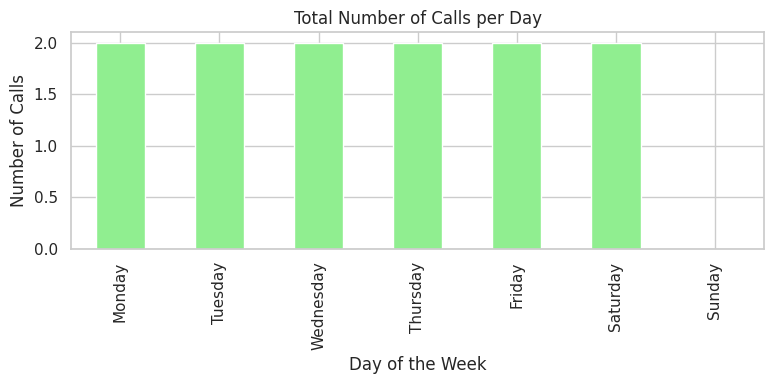

/tmp/ipython-input-1412845549.py:55: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='Agent', columns='Day', values='Duration_Min', aggfunc='mean')


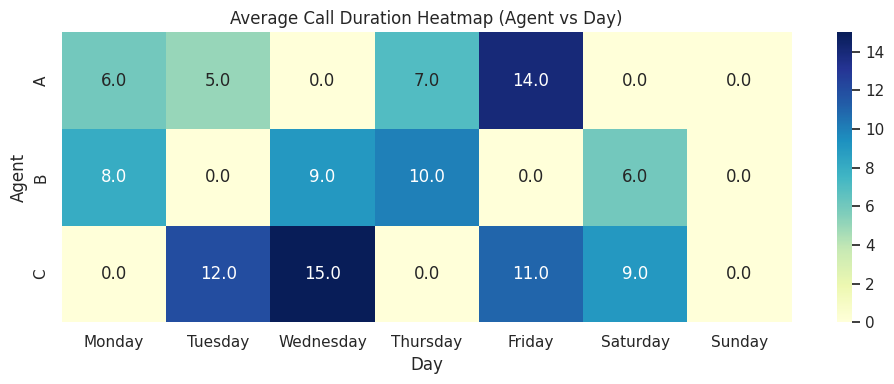

In [ ]:
# ...existing code...
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Sample Call Log Data ---
data = {
    'Call_ID': range(1, 13),
    'Agent': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Start_Time': [
        '2025-10-27 09:10', '2025-10-27 10:15', '2025-10-28 11:45',
        '2025-10-28 12:30', '2025-10-29 14:00', '2025-10-29 15:20',
        '2025-10-30 16:45', '2025-10-30 17:10', '2025-10-31 18:00',
        '2025-10-31 19:15', '2025-11-01 10:05', '2025-11-01 11:25'
    ],
    'Duration_Min': [6, 8, 12, 5, 9, 15, 7, 10, 11, 14, 6, 9]
}

# --- Convert to DataFrame ---
df = pd.DataFrame(data)
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour

# Ensure day names use a consistent weekday order
day_order = list(calendar.day_name)  # ['Monday', 'Tuesday', ...]
df['Day'] = df['Start_Time'].dt.day_name()
df['Day'] = pd.Categorical(df['Day'], categories=day_order, ordered=True)

sns.set_theme(style='whitegrid')

# --- 1. Line Chart: Average Duration by Hour ---
avg_by_hour = df.groupby('Hour')['Duration_Min'].mean().reindex(range(24), fill_value=0)
plt.figure(figsize=(9,4))
plt.plot(avg_by_hour.index, avg_by_hour.values, color='orange', marker='o')
plt.title("Average Call Duration by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Duration (minutes)")
plt.xticks(range(0,24,1))
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 2. Bar Chart: Calls per Day ---
calls_per_day = df['Day'].value_counts().reindex(day_order, fill_value=0)
plt.figure(figsize=(8,4))
calls_per_day.plot(kind='bar', color='lightgreen')
plt.title("Total Number of Calls per Day")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Calls")
plt.tight_layout()
plt.show()

# --- 3. Heatmap: Duration by Agent and Day ---
heatmap_data = df.pivot_table(index='Agent', columns='Day', values='Duration_Min', aggfunc='mean')
# Reindex columns to full weekday order and fill missing values with 0 (or np.nan if preferred)
heatmap_data = heatmap_data.reindex(columns=day_order).fillna(0)
plt.figure(figsize=(10,4))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title("Average Call Duration Heatmap (Agent vs Day)")
plt.xlabel("Day")
plt.ylabel("Agent")
plt.tight_layout()
plt.show()
# ...existing code...